Super Simple piece of code that makes nice plots with uproot.

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def getData(fileName, fileID, folder):
    with uproot.open("/Users/gabbygelinas/Desktop/Masters/RootFiles/"+fileName) as f:
    
        y_data = f[folder][fileID].to_numpy()[0] #y data
        bins = f[folder][fileID].to_numpy()[1][0:-1] #x data
    
    return bins, y_data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit, minimize
from scipy.signal import fftconvolve
import numpy as np
plt.rcParams.update({
    'font.size': 16,          # Global default font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 16,     # Axis label font size
    'xtick.labelsize': 16,    # X tick size
    'ytick.labelsize': 16,    # Y tick size
    'legend.fontsize': 13,    # Legend font size
})

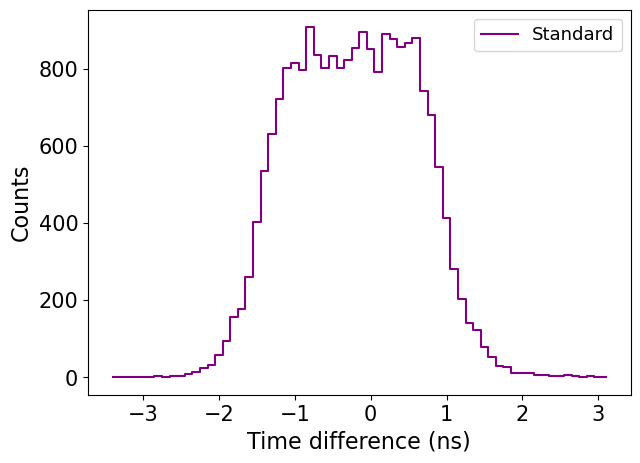

In [3]:
def plot_root_timeDiff(rootPath, figurePath, folder, fileID):
    with uproot.open(rootPath) as f:
    
        y_data = f[folder][fileID].to_numpy()[0] #y data
        bins = f[folder][fileID].to_numpy()[1][0:-1] #x data
        bins_raw = f[folder][fileID].to_numpy()[1]
        
        y_data_cut = y_data[int(len(y_data)/3):2*int(len(y_data)/3)]
        bins_cut = bins[int(len(y_data)/3):2*int(len(y_data)/3)]
        
        # Chop the top off
        y_data_chopped = np.zeros(len(y_data_cut))
        threshold=0.15
        peakHeight = max(y_data_cut)
        for i in range(len(y_data_cut)):
            if y_data_cut[i]>((1-threshold)*peakHeight):
                y_data_chopped[i] = (1-threshold)*peakHeight
            
            else:
                y_data_chopped[i] = y_data_cut[i]
        
        plt.figure(figsize=(7, 5))
        #plt.plot(bins_cut, y_data_cut, "tab:purple", label="Standard")
        plt.step(bins_cut, y_data_cut, where="mid", color="purple", label="Standard")
        #plt.plot(bins_cut, y_data_chopped, 'k',linestyle="--", label="Chopped")
        plt.xlabel("Time difference (ns)", fontsize=16)
        plt.ylabel("Counts", fontsize=16)
        plt.legend()
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.savefig(figurePath,bbox_inches='tight')
    
rootFolderPath = "/Users/sidne/DL_rootfiles"
figureFolderPath = "/Users/sidne/DL_rootfiles"
runNumber = "00368"
rootFilePath = rootFolderPath+'/output'+runNumber+".root"
fileID = "dltdc16_sc01_t_01_09_ns_cut_twc"
#fileID = 'dltdc8_pair3_t_03_11_ns_cut_twc'
#fileID = 'dltdc8_pair1_t_01_09_ns_cut_twc'
folder = "dltdc16"

figurePath = figureFolderPath+'/timeDiff_run'+runNumber+'_'+fileID


plot_root_timeDiff(rootFilePath, figurePath, folder, fileID)
    

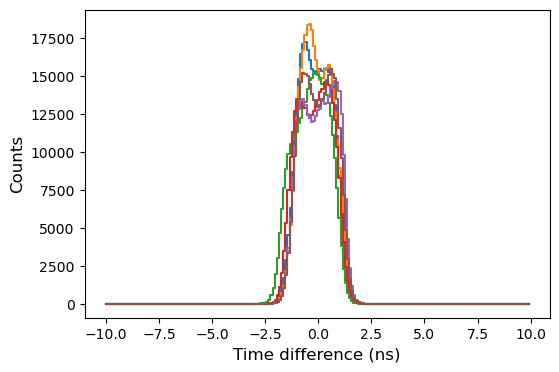

In [93]:
# For coupling agent dependence
figurePath = "/Users/gabbygelinas/Desktop/Masters/TemporaryPlots/couplingAgent_run00368_sc01_goodSilicone"

plt.figure(figsize=(6, 4))

with uproot.open("/Users/gabbygelinas/Desktop/Masters/RootFiles/output00362.root") as f:
    fileID_list = ["dltdc8_pair1_t_01_09_ns_cut_twc", "dltdc8_pair2_t_02_10_ns_cut_twc","dltdc8_pair3_t_03_11_ns_cut_twc",
                  "dltdc8_pair4_t_04_12_ns_cut_twc", "dltdc8_pair7_t_07_15_ns_cut_twc","dltdc8_pair8_t_08_16_ns_cut_twc"]
    folder = "dltdc8"
    
    for i in range(len(fileID_list)):
        fileID = fileID_list[i]
    
        y_data = f[folder][fileID].to_numpy()[0] #y data
        bins = f[folder][fileID].to_numpy()[1][0:-1] #x data
    
        #plt.plot(bins_cut, y_data_cut, "tab:purple", label="Standard")
        plt.step(bins, y_data, where="mid",label="Calibrated")
        plt.xlabel("Time difference (ns)", fontsize=12)
        plt.ylabel("Counts", fontsize=12)

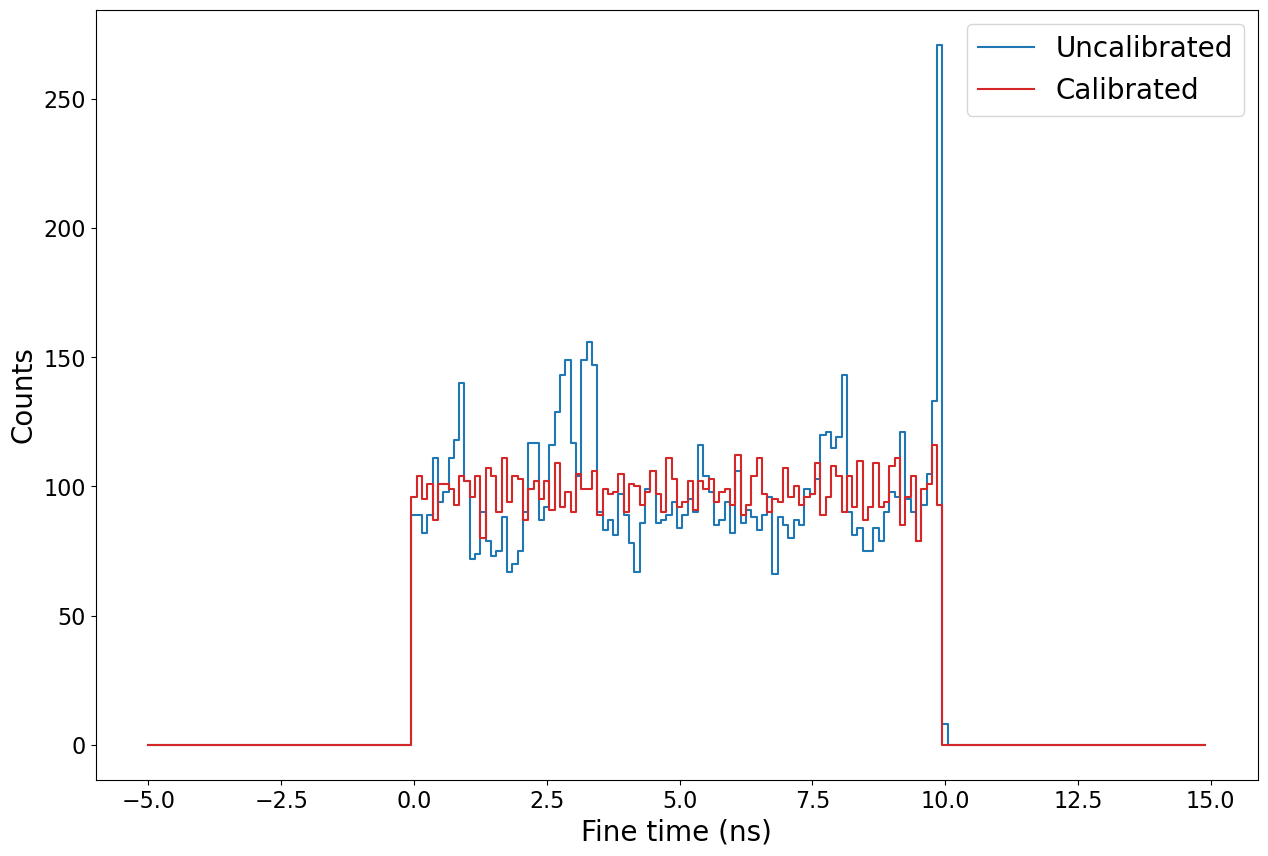

In [38]:
fileID = "tdc03_fine_time_te"

with uproot.open("/Users/gabbygelinas/Desktop/Masters/RootFiles2/output00556.root") as f:
    folder = "dltdc/fine_time"
    
    y_data = f[folder][fileID].to_numpy()[0] #y data
    bins = f[folder][fileID].to_numpy()[1][0:-1] #x data
    
    lower=int(0.15*len(bins))
    upper=int(0.85*len(bins))

    
    plt.figure(figsize=(15, 10))
    #plt.plot(bins_cut, y_data_cut, "tab:purple", label="Standard")
    #plt.step(bins[lower:upper], y_data[lower:upper], where="mid",color='tab:blue',label="Uncalibrated")
    plt.step(bins, y_data, where="mid",color='tab:blue',label="Uncalibrated")
    plt.xlabel("Fine time (ns)", fontsize=12)
    plt.ylabel("Counts", fontsize=12)
    
    
with uproot.open("/Users/gabbygelinas/Desktop/Masters/RootFiles/output00556.root") as f:
    folder = "dltdc/fine_time"
    
    y_data = f[folder][fileID].to_numpy()[0] #y data
    bins = f[folder][fileID].to_numpy()[1][0:-1] #x data
    
    lower=int(0.15*len(bins))
    upper=int(0.85*len(bins))
    
    #plt.plot(bins_cut, y_data_cut, "tab:purple", label="Standard")
    #plt.step(bins[lower:upper], y_data[lower:upper], where="mid", color='g',label="Calibrated")
    plt.step(bins, y_data, where="mid",color='tab:red',label="Calibrated")
    plt.xlabel("Fine time (ns)", fontsize=20)
    plt.ylabel("Counts", fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)
plt.savefig("/Users/gabbygelinas/Desktop/Masters/TemporaryPlots/run556_tdc03_finetime")

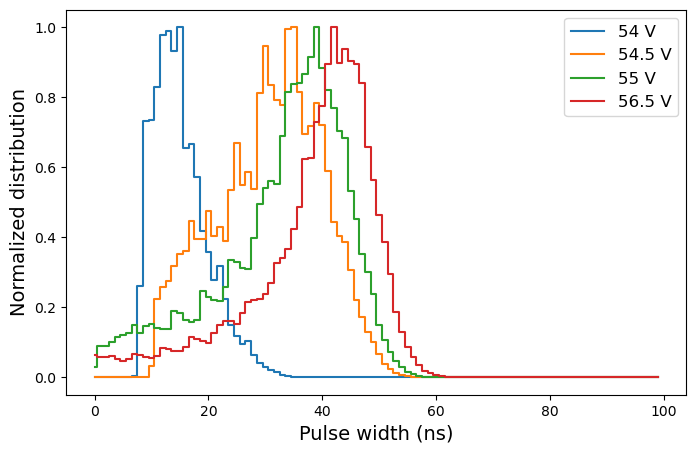

In [20]:
# Pulse width distributions getting out of the noise
plt.figure(figsize=(8, 5))

files = ["output00552.root", "output00553.root","output00551.root","output00555.root"]
fileID = "dltdc16_w30_ns"
folder = "dltdc16/per-channel pulse height plots"
labels = ["54 V", "54.5 V", "55 V", "56.5 V"]
colours = ['tab:blue']

for i in range(len(files)):
    bins, y_data = getData(files[i], fileID, folder)
    plt.step(bins, y_data/max(y_data), where="mid", label=labels[i])
    
    
plt.xlabel("Pulse width (ns)", fontsize=14)
plt.ylabel("Normalized distribution", fontsize=14)
plt.legend(fontsize=12)
plt.savefig("/Users/gabbygelinas/Desktop/Masters/TemporaryPlots/pulseWidths_awayFromNoise")

2865045.0
1019686.0
653273.0


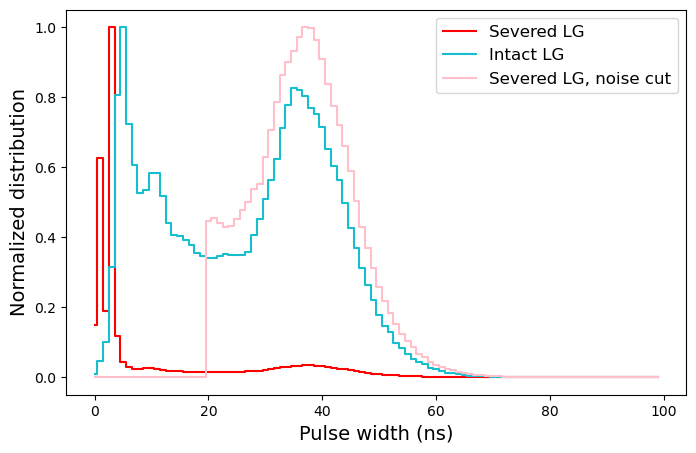

In [29]:
# Pulse width distributions to show the effect of broken light guides

folder = "dltdc16/per-channel pulse height plots"
colours = ['tab:blue']

plt.figure(figsize=(8, 5))
bins_bad, y_data_bad = getData("output00453.root", 'dltdc16_w17_ns', folder)
plt.step(bins_bad, y_data_bad/max(y_data_bad), where="mid", color='red', label='Severed LG')
print(sum(y_data_bad))

bins_good, y_data_good = getData("output00453.root", 'dltdc16_w25_ns', folder)
plt.step(bins_good, y_data_good/max(y_data_good), where="mid", color='tab:cyan', label='Intact LG')
print(sum(y_data_good))

bins_bad_cut, y_data_bad_cut = getData("output00453.root", 'dltdc16_w17_ns_cut', folder)
plt.step(bins_bad_cut, y_data_bad_cut/max(y_data_bad_cut), where="mid", color='pink', label='Severed LG, noise cut')
print(sum(y_data_bad_cut))

plt.xlabel("Pulse width (ns)", fontsize=14)
plt.ylabel("Normalized distribution", fontsize=14)
plt.legend(fontsize=12)
plt.savefig("/Users/gabbygelinas/Desktop/Masters/TemporaryPlots/pulseWidths_brokenLightGuides")

In [ ]:
bins, ydata = getData('output00049.root', fileID, folder)